<a href="https://colab.research.google.com/github/esnue/ThesisAllocationSystem/blob/main/4_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualization of CTM output results
In this notebook, we will visualize our CTM output. 

## Import what we need

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.colors as mcolors

## Data
Let's import the dataframe that holds all of the relevant CTM outputs for our corpus of academic papers. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
topics_df = pd.read_csv('/content/drive/MyDrive/ThesisAllocationSystem/data_final/ctm_label/train-label.csv')

print(topics_df.sample(5))
print("There are ", len(topics_df.topic_id.unique()), "topics in total.")

             prof  ...                                       distribution
69   Jankin31.txt  ...  [0.3047329291701317, 0.03640054653515108, 0.07...
252    Graf19.txt  ...  [0.024429706582981225, 0.10361603614691325, 0....
632    Mair40.txt  ...  [0.17695424752309918, 0.032866972556803375, 0....
687      reh3.txt  ...  [0.03768790876492858, 0.15055828373879193, 0.0...
435  kayser29.txt  ...  [0.032081148817087526, 0.053705329436343166, 0...

[5 rows x 4 columns]
There are  14 topics in total.


## Create wide & long format

In [ ]:
# Extract list of topic proportions 
list_prop = topics_df.iloc[:,3]

# Convert to float array
ar_float = np.array([[float(i) for i in j[1:-1].split(', ')] for j in list_prop])

# Create col labels 
topics = []
for i in list(range(0, 14)):
     topics.append('Topic' + str(i))

# Add col labels to float array
topiclab_df = pd.DataFrame(data = ar_float, columns=topics)
topiclab_df.head()

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13
0,0.029148,0.048317,0.042798,0.414977,0.024886,0.010979,0.015934,0.020120,0.045134,0.119140,0.035784,0.031800,0.120523,0.040462
1,0.059049,0.042824,0.050354,0.098719,0.059226,0.030231,0.024346,0.030732,0.044437,0.406889,0.045451,0.034186,0.030652,0.042904
2,0.074832,0.020230,0.431732,0.022440,0.037525,0.034745,0.063733,0.168694,0.052268,0.040004,0.007308,0.027191,0.010105,0.009194
3,0.022292,0.025449,0.048664,0.168182,0.027363,0.013397,0.012804,0.020017,0.044615,0.477421,0.039641,0.026206,0.041068,0.032882
4,0.055413,0.075328,0.044877,0.174996,0.050884,0.017417,0.020037,0.033000,0.053647,0.109604,0.104331,0.048740,0.161123,0.050602


In [ ]:
# Change col name 
topics_df.rename(columns={"topic": "topic_words"}, inplace = True)

# Append wide format to topics_df
topics_df_wide = pd.concat([topics_df.iloc[:, 0:3], topiclab_df], axis = 1)

# Reshape to long format
topics_df_long = topics_df_wide.melt(id_vars = ['prof', 'topic_id', 'topic_words'],
                                     var_name = 'topic',
                                     value_name = 'topic_prop')

In [ ]:
print("This is the wide format.\n", topics_df_wide.head(5))
print("This is the long format.\n", topics_df_long.head(5))

This is the wide format.
                 prof  topic_id  ...   Topic12   Topic13
0  Hammerschmid1.txt         3  ...  0.120523  0.040462
1  Hammerschmid2.txt         9  ...  0.030652  0.042904
2  Hammerschmid3.txt         2  ...  0.010105  0.009194
3  Hammerschmid4.txt         9  ...  0.041068  0.032882
4  Hammerschmid5.txt         3  ...  0.161123  0.050602

[5 rows x 17 columns]
This is the long format.
                 prof  topic_id  ...   topic topic_prop
0  Hammerschmid1.txt         3  ...  Topic0   0.029148
1  Hammerschmid2.txt         9  ...  Topic0   0.059049
2  Hammerschmid3.txt         2  ...  Topic0   0.074832
3  Hammerschmid4.txt         9  ...  Topic0   0.022292
4  Hammerschmid5.txt         3  ...  Topic0   0.055413

[5 rows x 5 columns]


In [ ]:
# Save wide and long formats 
topics_df_wide.to_csv('/content/drive/MyDrive/ThesisAllocationSystem/data_final/ctm_label/train-label_wide.csv', index = False)
topics_df_wide.to_csv('/content/drive/MyDrive/ThesisAllocationSystem/data_final/ctm_label/train-label_long.csv', index = False)

## Stacked Bar Chart

In [ ]:
topics_df_wide.iloc[:, 4:31]

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13
0,0.048317,0.042798,0.414977,0.024886,0.010979,0.015934,0.020120,0.045134,0.119140,0.035784,0.031800,0.120523,0.040462
1,0.042824,0.050354,0.098719,0.059226,0.030231,0.024346,0.030732,0.044437,0.406889,0.045451,0.034186,0.030652,0.042904
2,0.020230,0.431732,0.022440,0.037525,0.034745,0.063733,0.168694,0.052268,0.040004,0.007308,0.027191,0.010105,0.009194
3,0.025449,0.048664,0.168182,0.027363,0.013397,0.012804,0.020017,0.044615,0.477421,0.039641,0.026206,0.041068,0.032882
4,0.075328,0.044877,0.174996,0.050884,0.017417,0.020037,0.033000,0.053647,0.109604,0.104331,0.048740,0.161123,0.050602
...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,0.062753,0.030189,0.174324,0.036210,0.027832,0.034370,0.051825,0.077760,0.115790,0.088033,0.051666,0.103583,0.052541
805,0.130309,0.043891,0.054486,0.028472,0.022347,0.027582,0.039934,0.042507,0.068508,0.067624,0.045281,0.264126,0.051174
806,0.065257,0.053638,0.062761,0.080346,0.029300,0.031227,0.048830,0.036084,0.081297,0.153285,0.038173,0.124845,0.040819
807,0.110885,0.060119,0.072842,0.039532,0.036266,0.037323,0.034770,0.046310,0.041758,0.059900,0.051411,0.257348,0.065576


In [ ]:
# Confirm percentage distribution by summing the percentages in each topic
topics_df_wide.iloc[:, 4:31].sum(axis=1) 

0      0.970852
1      0.940951
2      0.925168
3      0.977708
4      0.944587
         ...   
804    0.906876
805    0.886241
806    0.845861
807    0.914041
808    0.975248
Length: 809, dtype: float64

In [ ]:
# Remove number and .txt from prof
topics_df_wide['prof'] = topics_df_wide['prof'].str.replace('[0-9]', '').str.replace('\.txt', '').str.upper()

# Create bar chart df 
bardat1 = pd.concat([topics_df_wide['prof'], topics_df_wide.iloc[:, 3:31]], axis = 1)

In [ ]:
# Solution 1: Average topic proportions per professor 
bardat2 = bardat1.groupby('prof').mean().reset_index()
print(bardat2.head(5))

        prof    Topic0    Topic1  ...   Topic11   Topic12   Topic13
0    ANHEIER  0.040446  0.050941  ...  0.096038  0.061919  0.042222
1     BRYSON  0.087904  0.043664  ...  0.039731  0.020097  0.032208
2       CALI  0.014002  0.598022  ...  0.135978  0.029262  0.012222
3  CINGOLANI  0.072019  0.053463  ...  0.043417  0.086562  0.059086
4        CIS  0.032580  0.055990  ...  0.043216  0.043860  0.026285

[5 rows x 15 columns]


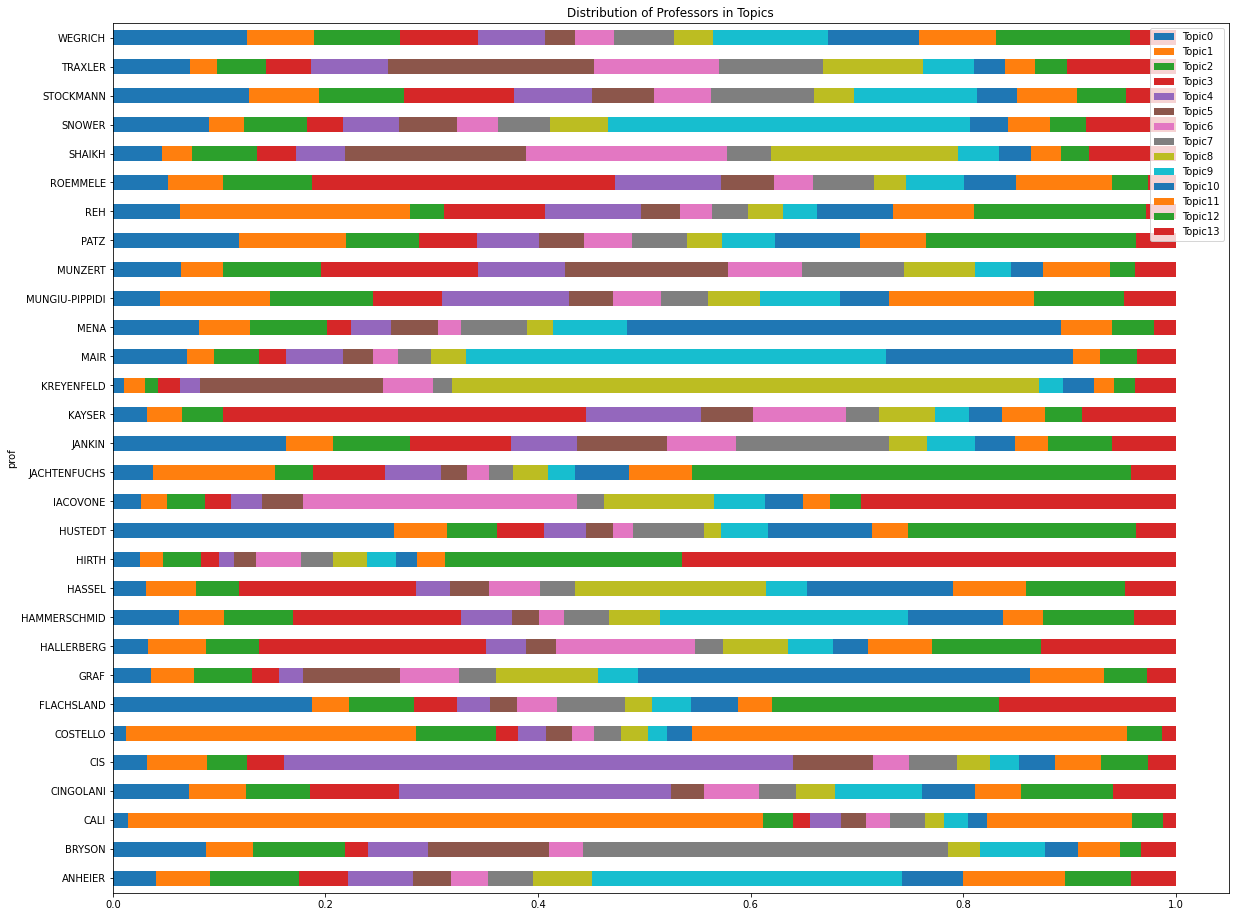

In [ ]:
plt.rcParams["figure.figsize"] = [20,16]
bardat2.plot(
    x = 'prof',
    kind = 'barh',
    stacked = True,
    title = 'Distribution of Professors in Topics',
    mark_right = True)

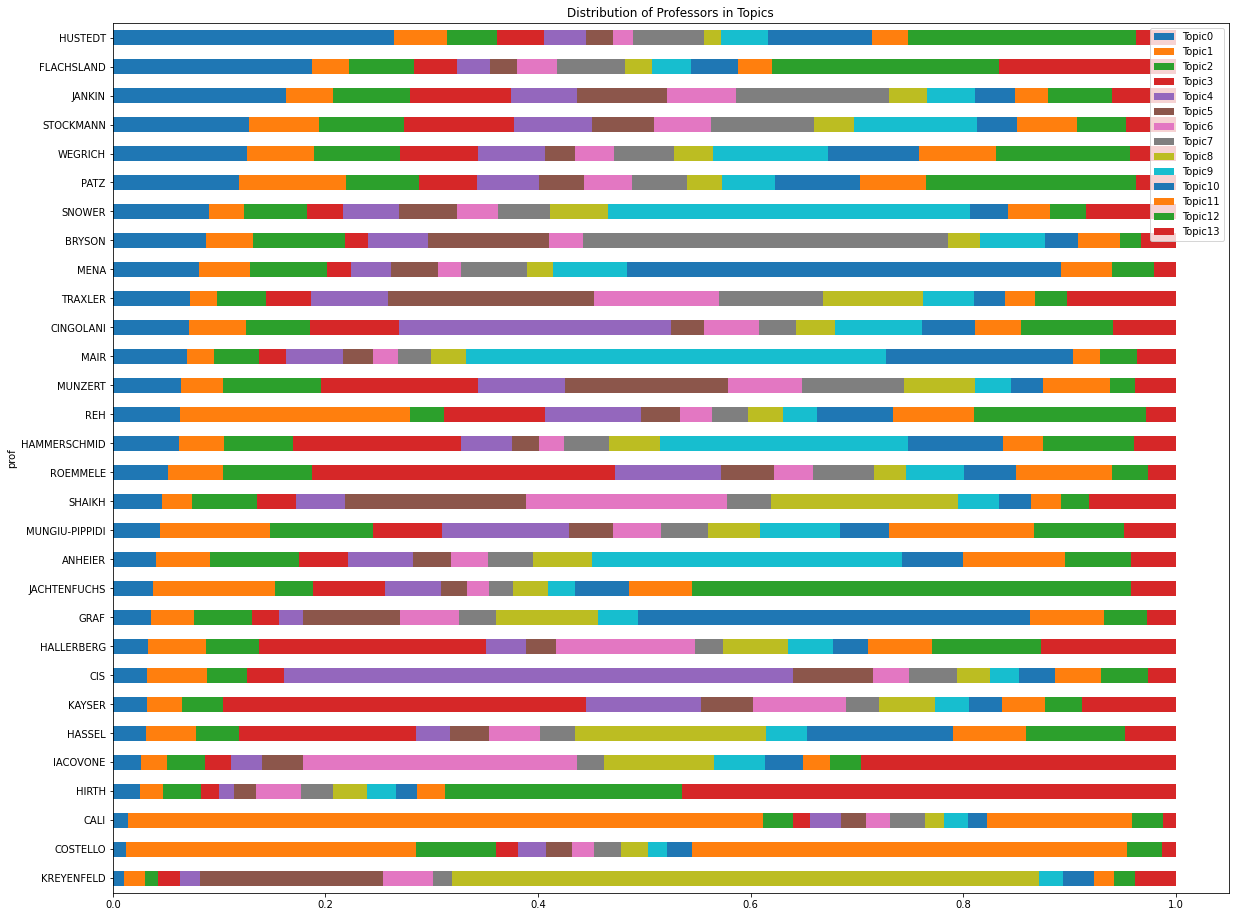

In [ ]:
# Sort by topics
bardat2 = bardat2.sort_values('Topic0')
plt.rcParams["figure.figsize"] = [20,16]
bardat2.plot(
    x = 'prof',
    kind = 'barh',
    stacked = True,
    title = 'Distribution of Professors in Topics',
    mark_right = True)


## Bar Chart: Word Counts of Topic Keywords

In [ ]:
topics_df_long.head(5)

,prof,topic_id,topic_words,topic,topic_prop
0,Hammerschmid1.txt,3,"['party', 'political', 'economic', 'election',...",Topic0,0.029148
1,Hammerschmid2.txt,9,"['social', 'business', 'entrepreneurship', 'ns...",Topic0,0.059049
2,Hammerschmid3.txt,2,"['ngovernance', 'nthose', 'billion', 'learn', ...",Topic0,0.074832
3,Hammerschmid4.txt,9,"['social', 'business', 'entrepreneurship', 'ns...",Topic0,0.022292
4,Hammerschmid5.txt,3,"['party', 'political', 'economic', 'election',...",Topic0,0.055413


In [ ]:
bardat = topics_df_long.iloc[:, 1:3]
bardat.head(5)

,topic_id,topic_words
0,3,"['party', 'political', 'economic', 'election',..."
1,9,"['social', 'business', 'entrepreneurship', 'ns..."
2,2,"['ngovernance', 'nthose', 'billion', 'learn', ..."
3,9,"['social', 'business', 'entrepreneurship', 'ns..."
4,3,"['party', 'political', 'economic', 'election',..."


In [ ]:
# remove leading white space's & split by delimiter
bardat['topic_words'] = bardat['topic_words'].str.strip()\
    .str.replace(",\s+", ",")\
    .str.split(',')

# apply group by to get count of each word.
bardat2  = bardat.explode(column='topic_words').groupby(["topic_id","topic_words"]).size().reset_index(name='count')

In [ ]:
bardat3 = bardat.groupby(['topic_id']).count().reset_index().rename(columns={"topic_words": "count"})
bardat3.head(5)

,topic_id,count
0,0,882
1,1,686
2,2,476
3,3,1288
4,4,868


In [ ]:
bardat3

,topic_id,count,topic_words
0,0,882,0
1,1,686,0
2,2,476,0
3,3,1288,0
4,4,868,0
5,5,560,0
6,6,546,0
7,7,770,0
8,8,672,0
9,9,1232,0


In [ ]:
''.join([bardat3['topic_id'].to_string(), str1])

"0      0\n1      1\n2      2\n3      3\n4      4\n5      5\n6      6\n7      7\n8      8\n9      9\n10    10\n11    11\n12    12\n13    130['party','political','economic',"

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

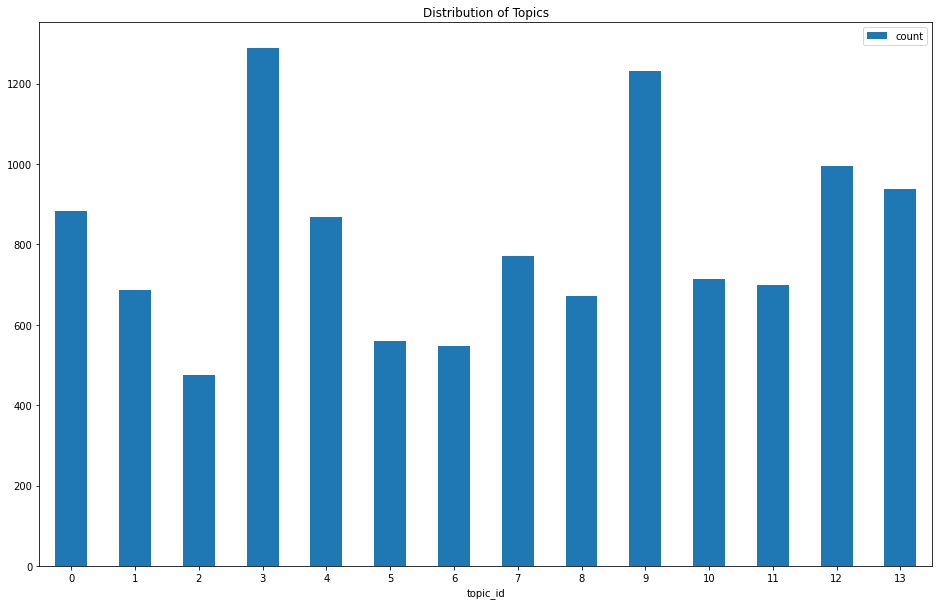

In [ ]:
# Plot
plt.rcParams["figure.figsize"] = [16,10]
bardat3.plot(
    x = 'topic_id',
    kind = "bar",
    stacked = False,
    title = 'Distribution of Topics',
    mark_right = True)
plt.xticks(rotation=0)

Visualize Loss

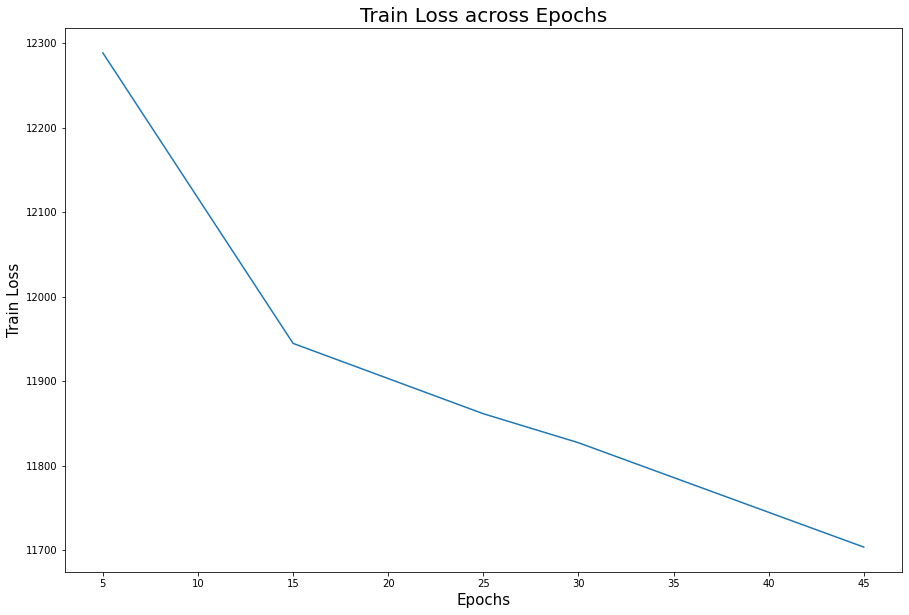

In [8]:
epochs = [5, 15, 25, 30, 45]

loss = [12288.245, 11944.792, 11861.608, 11827.34, 11703.930]

x_unit_length = 5
y_unit_length = 5000

#for e, l in itertools.zip_longest(epochs, loss):
plt.rcParams["figure.figsize"] = [15, 10]
plt.title("Train Loss across Epochs", fontsize=20)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Train Loss", fontsize=15)
plt.plot(epochs, loss)
plt.show()
